Comments    100.0
dtype: float64
Outliers per column:
 GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


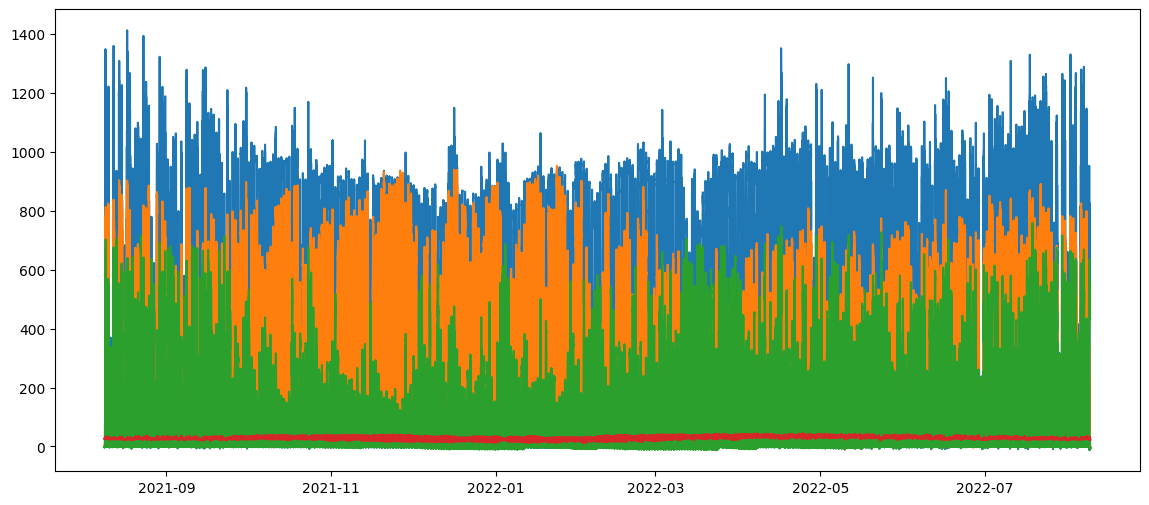

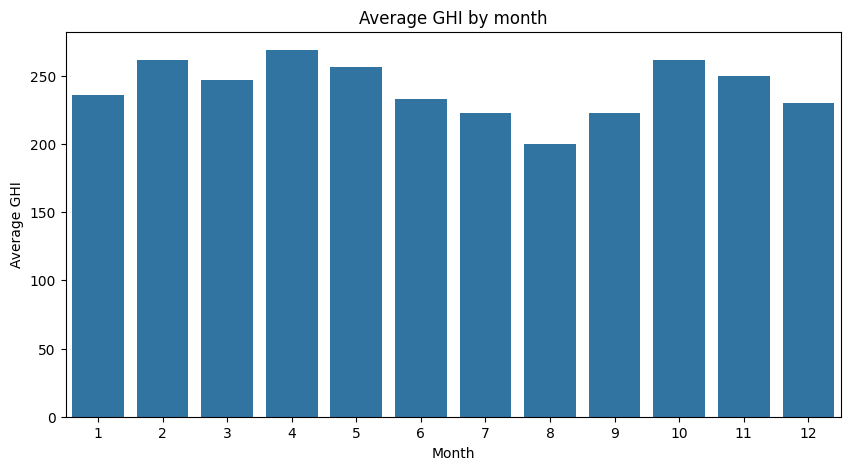

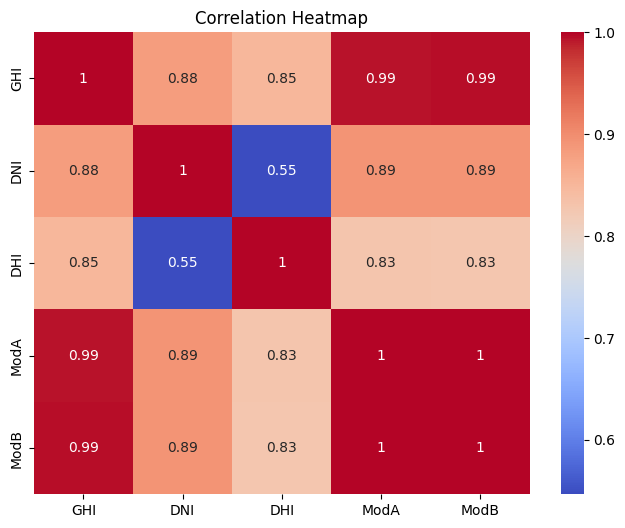

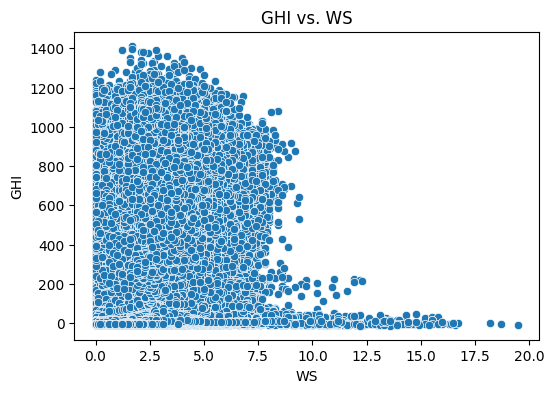

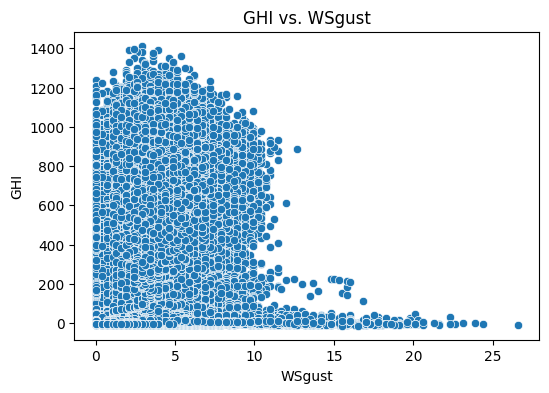

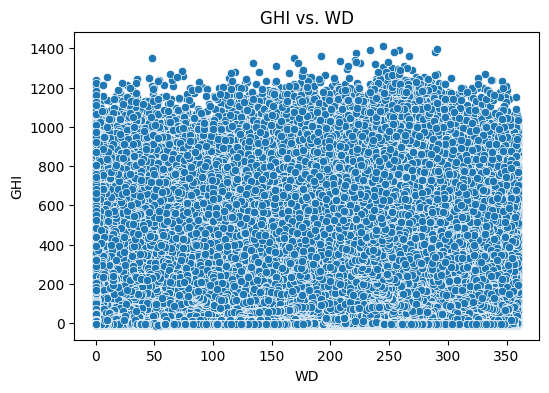

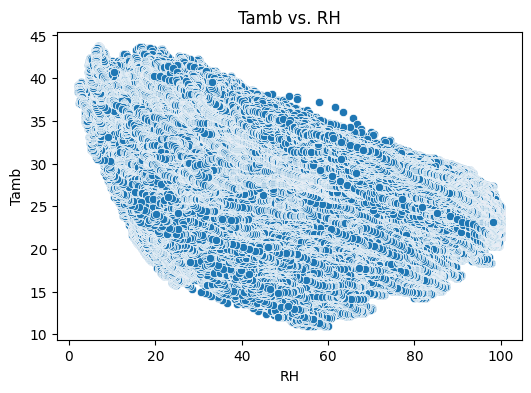

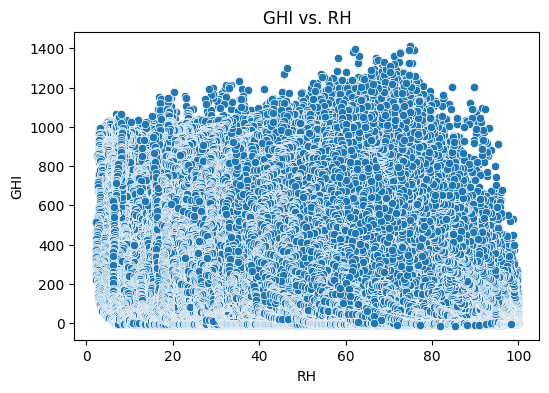

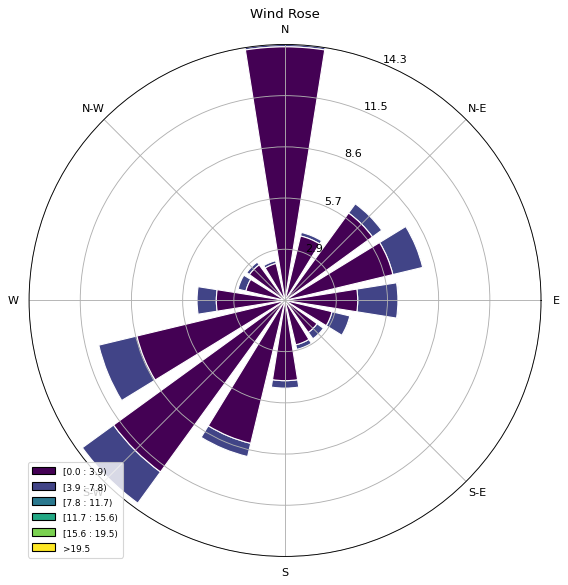

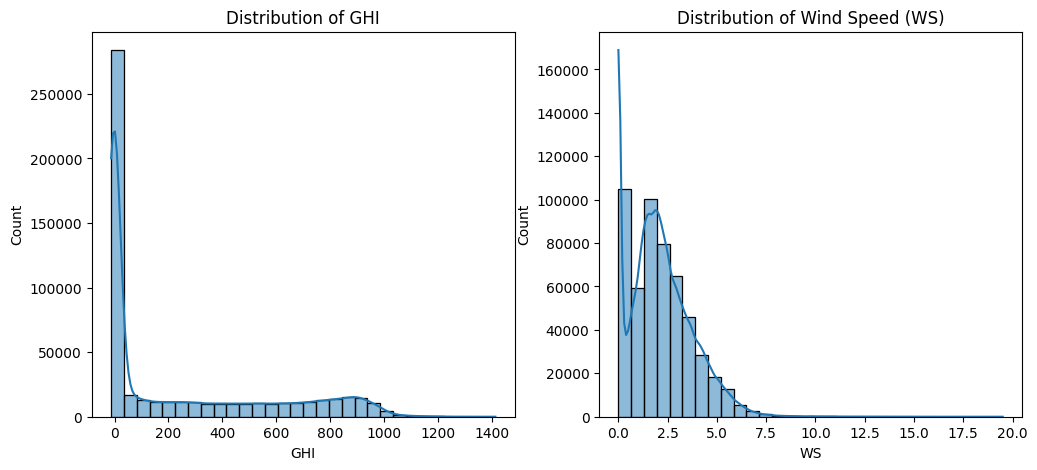

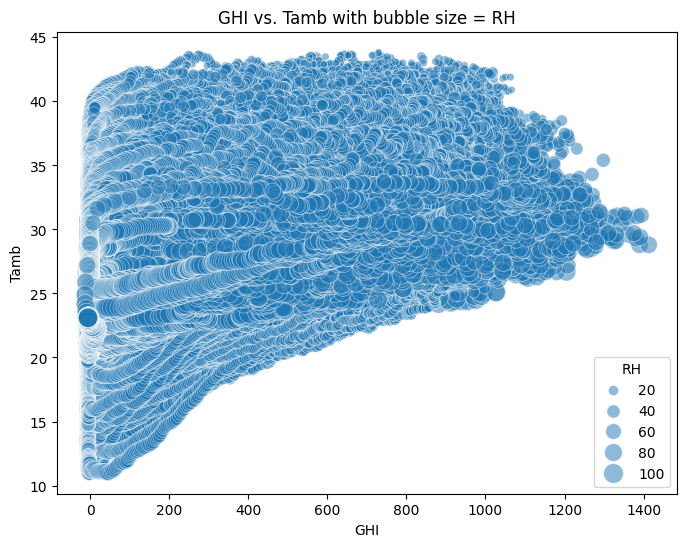

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from windrose import WindroseAxes

# Loading Data
df = pd.read_csv(r"C:/Users/pc/Desktop/10 Academy/Week 0/data/benin-malanville.csv")

# Summary Statistics & Missing-Value Report
# to generate descriptive statistics of the DataFrame's numeric columns

df.describe()

#  Count the number of missing (NaN) values in each column of the DataFrame

df.isna().sum()

# identify column with >5% nulls
# Calculate the percentage of nulls in each column
null_percent = df.isnull().mean() * 100

# Filter columns with more than 5% nulls
cols_with_gt_5pct_nulls = null_percent[null_percent > 5]

# Display the result
print(cols_with_gt_5pct_nulls)

# Outlier Detection & Basic Cleaning
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
available_columns = [col for col in key_columns if col in df.columns]

#Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; flag rows with |Z|>3.
z_scores = df[available_columns].apply(zscore)
outliers = (z_scores.abs() > 3)
print("Outliers per column:\n", outliers.sum())

#Drop or impute (median) missing values in key columns
df[available_columns] = df[available_columns].fillna(df[available_columns].median())

df.to_csv("data/benin_clean.csv", index=False)
# ●	Time Series Analysis

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(14, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')

# month and hour columns

df['month'] = df['Timestamp'].dt.month
df['hour'] = df['Timestamp'].dt.hour

monthly_avg = df.groupby('month')['GHI'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average GHI by month')
plt.xlabel('Month')
plt.ylabel('Average GHI')
plt.show()

#Cleaning Impact 
# #Correlation & Relationship Analysis


if 'Cleaning' in df.columns:
    corr_vars = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
    corr_matrix = df[corr_vars].corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No 'Cleaning' flag found in data.")


scatter_vars = [('WS', 'GHI'), ('WSgust', 'GHI'), ('WD', 'GHI'), ('RH', 'Tamb'), ('RH', 'GHI')]

for x_var, y_var in scatter_vars:
    if x_var in df.columns and y_var in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=x_var, y=y_var)
        plt.title(f'{y_var} vs. {x_var}')
        plt.show()

#Wind & Distribution Analysis

if 'WS' in df.columns and 'WD' in df.columns:
    ax = WindroseAxes.from_ax()
    ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
    ax.set_title('Wind Rose')
    ax.set_legend()
    plt.show()
else:
    print("Missing WS or WD columns for wind rose.")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['GHI'], bins=30, kde=True)
plt.title('Distribution of GHI')

plt.subplot(1,2,2)
sns.histplot(df['WS'], bins=30, kde=True)
plt.title('Distribution of Wind Speed (WS)')

plt.show()

plt.figure(figsize=(8,6))

size_var = 'RH' if 'RH' in df.columns else ('BP' if 'BP' in df.columns else None)
if size_var:
    sns.scatterplot(data=df, x='GHI', y='Tamb', size=size_var, sizes=(20, 200), alpha=0.5)
    plt.title(f'GHI vs. Tamb with bubble size = {size_var}')
    plt.show()
else:
    print("Neither 'RH' nor 'BP' found in data for bubble size.")       